# Certamen 2, series de tiempo I

-Daniela Díaz Mora 

-Franco Gonzales

-Bastian Araya


## Brockwell & Davis (2006) Times Series Theory and Methos

### Exercise 9.13

Para cada uno de las series de tiempo B-F en el apendice A encuentre un modelo ARIMA( o ARMa) que represente las series obtenidas eliminando las ultimas seis obeservaciones.

Explca y justifica tu elección del modelo en cada caso, dando intervalos de confianza  para los coeficientes estimados. Use cada modelo ajustado para obtener los valores predictivos de los seis observaciones eliminadas y 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from datetime import date, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot


### Series B. Dow Jones Utilities Index, 28 Aug - 18 Dec, 1972 

In [2]:
Y_B=[110.94,110.69,110.43,110.56,110.75,110.84,110.46,110.56,110.46,110.05,109.60,109.31,109.31,109.25,109.02,108.54,108.77,109.02,109.44,109.38,109.53,109.89,110.56,110.56,110.72,111.23,111.48,111.58,111.90,112.19,112.06,111.96,111.68,111.36,111.42,112.00,112.22,112.70,113.15,114.36,114.65,115.06,115.86,116.40,116.44,116.88,118.07,118.51,119.28,119.79,119.70,119.28,119.66,120.14,120.97,121.13,121.55,121.96,122.26,123.79,124.11,124.14,123.37,123.02,122.86,123.02,123.11,123.05,123.05,122.83,123.18,122.67,122.73,122.86,122.67,122.09,122.00,121.23]

In [3]:
date_i=date(1972,8,28)
date_f=date(1972,12,18)
delta_b=date_f-date_i
X_B=[]
for i in range(delta_b.days+1):
    day=date_i+timedelta(days=1)
    X_B.append(day)

In [4]:
X_B=pd.date_range(start='1972-08-28',end='1972-12-18').tolist()
lis=[]
for j in range(0,18):
    lis.append(5+j*7)
    lis.append(6+j*7)
for i in range(len(X_B)-1,-1,-1):
    if i in lis:
        X_B.pop(i)

Grafica de la serie

/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


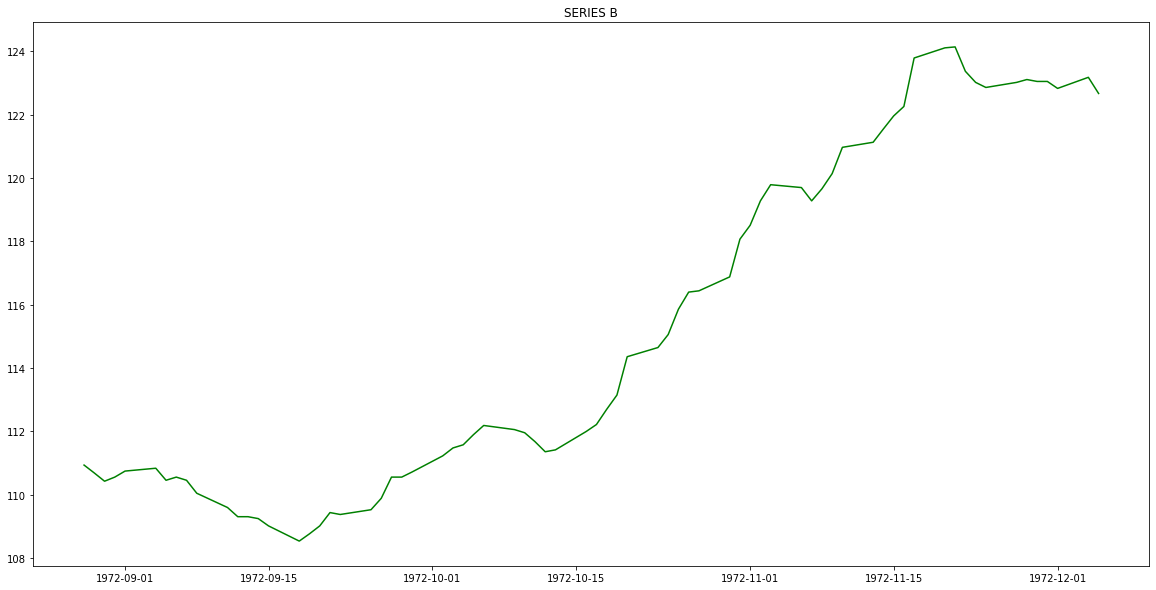

In [5]:
plt.figure(figsize=(20,10))
plt.plot(X_B[0:len(Y_B)-6],Y_B[0:len(Y_B)-6],c='g')
plt.title('SERIES B')
plt.show()

/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


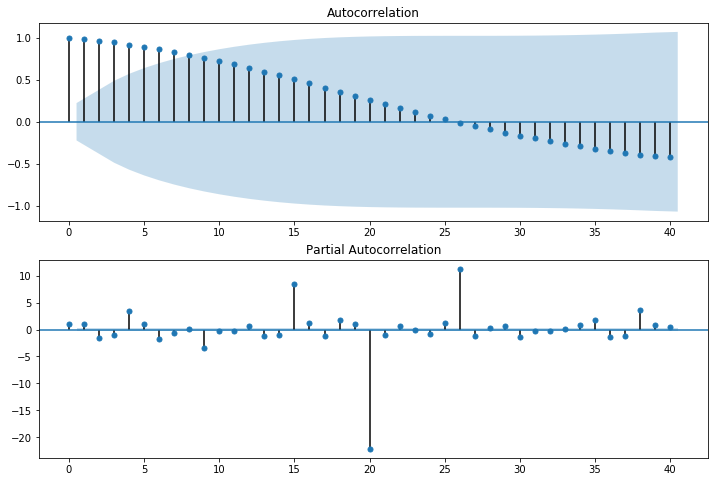

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y_B, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y_B, lags=40, ax=ax2)


### Series C. Private Housing Units Started, U.S.A (Monthly) [Makridakis 922]

In [6]:
Y_C=[1361,1278,1443,1524,1483,1404,1450,1517,1324,1533,1622,1564,1244,1456,1534,1689,1641,1588,1614,1639,1763,1779,1622,1491,1603,1820,1517,1448,1467,1550,1562,1569,1455,1524,1486,1484,1361,1433,1423,1438,1478,1488,1529,1432,1482,1452,1460,1656,1370,1378,1394,1352,1265,1194,1086,1119,1046,843,961,990,1067,1123,1056,1091,1304,1248,1364,1407,1421,1491,1538,1308,1380,1520,1466,1554,1408,1405,1512,1495,1556,1569,1630,1548,1769,1705,1561,1524,1583,1528,1368,1358,1507,1381,1229,1327,1085,1305,1319,1264,1290,1385,1517,1399,1534,1580,1647,1893,1828,1741,1910,1986,2049,2026,2083,2158,2041,2128,2182,2295,2494,2390,2334,2249,2221,2254,2252,2382,2481,2485,2421,2366,2481,2289,2365,2084,2266,2067,2123,2051,1874,1677,1724,1526]
meses=['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
meses_C=meses
count=2
for i in range(0,len(Y_C)):
    if i>11:
        meses_C.append('0'+str(count)+'_'+meses_C[i%12])
        if i%12==11:
            count+=1
for i in range(0,12):
    meses_C[i]='01_'+meses_C[i]

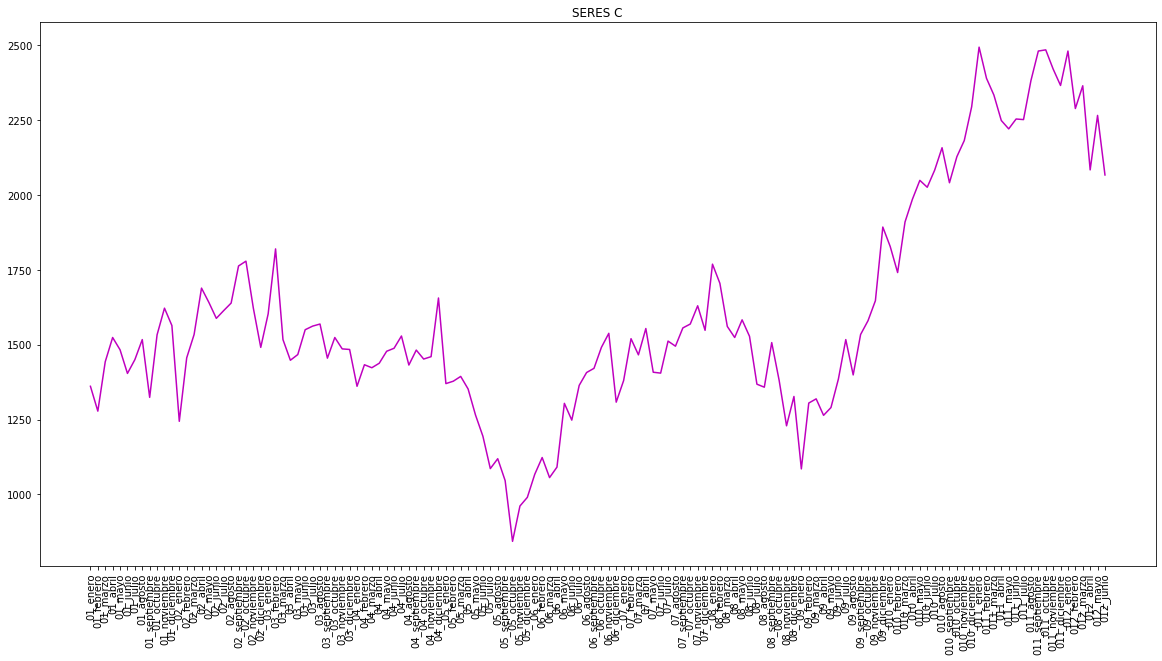

In [7]:
plt.figure(figsize=(20,10))
plt.plot(meses_C[0:len(Y_C)-6],Y_C[0:len(Y_C)-6],c='m')
plt.title('SERES C')
plt.xticks(rotation=90)
plt.show()

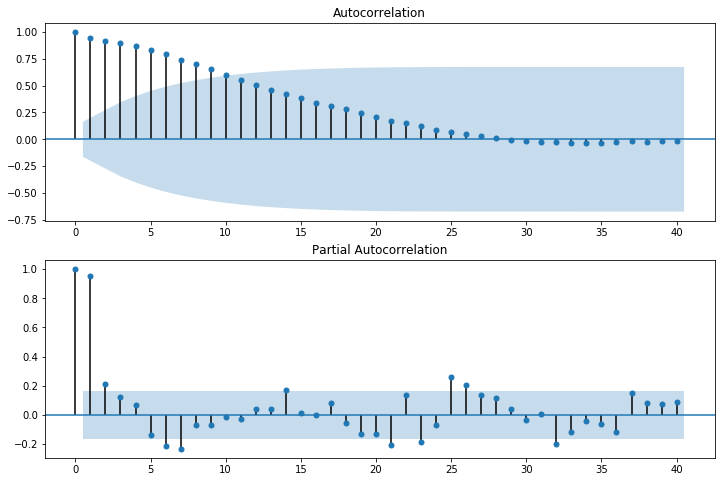

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y_C, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y_C, lags=40, ax=ax2)


### Series D. Industrial Production, Austria (Quarterly). [Makridakis 337]

In [8]:
Y_D=[54.1,59.5,56.5,63.9,57.8,62.0,58.5,65.0,59.6,63.6,60.4,66.3,60.6,66.8,63.2,71.0,66.5,72.0,67.8,75.6,69.2,74.1,70.7,77.8,72.3,78.1,72.4,82.6,72.9,79.5,72.6,82.8,76.0,85.1,80.5,89.1,84.8,94.2,89.5,99.3,93.1,103.5,96.4,107.2,101.7,109.5,101.3,112.6,105.5,115.4,108.0,129.9,112.4,123.6,114.9,131.0,122.6,131.9,120.5,130.7,115.7,119.7,109.7,125.1]
quar=['first','second','third']
count=2
for i in range(0,len(Y_D)):
    if i>2:
        quar.append('0'+str(count)+'_'+quar[i%3])
        if i%3==2:
            count+=1
for i in range(0,3):
    quar[i]='01_'+quar[i]           

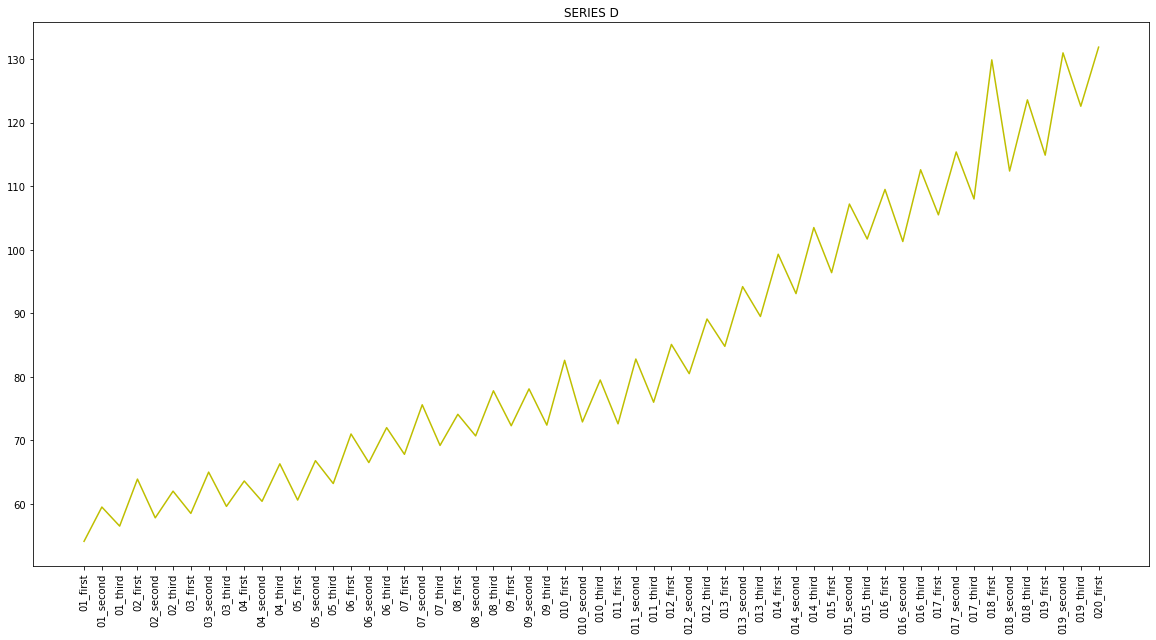

In [9]:
plt.figure(figsize=(20,10))
plt.plot(quar[0:len(Y_D)-6],Y_D[0:len(Y_D)-6],c='y')
plt.title('SERIES D')
plt.xticks(rotation=90)
plt.show()

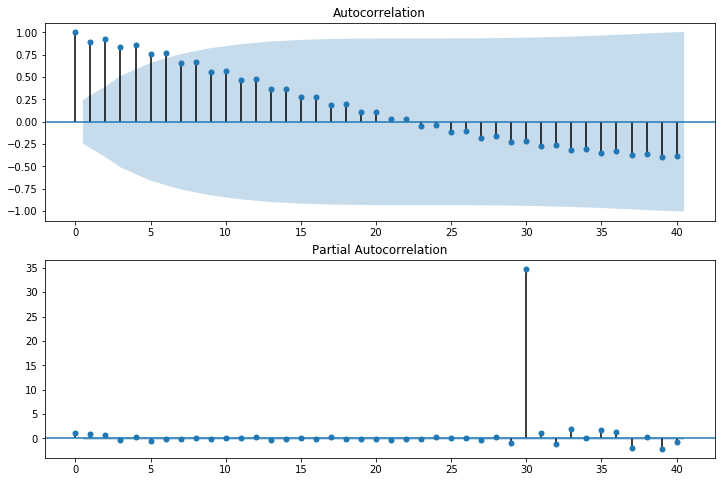

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y_D, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y_D, lags=40, ax=ax2)


### Series E. Industrial Production, Spain (Monthly). [Makridakis 868]

In [10]:
Y_E=[128,134,133,141,134,142,143,136,108,142,146,149,141,156,151,160,156,160,161,149,118,147,158,146,132,139,139,137,144,146,149,142,101,141,122,145,148,137,137,155,152,153,152,153,113,151,159,165,161,160,167,178,167,176,173,164,123,175,175,176,174]
meses_E=meses
count=2
for i in range(0,len(Y_E)):
    if i>11:
        meses_E.append('0'+str(count)+'_'+meses_E[i%12])
        if i%12==11:
            count+=1
for i in range(0,12):
    meses_E[i]='01_'+meses_E[i]

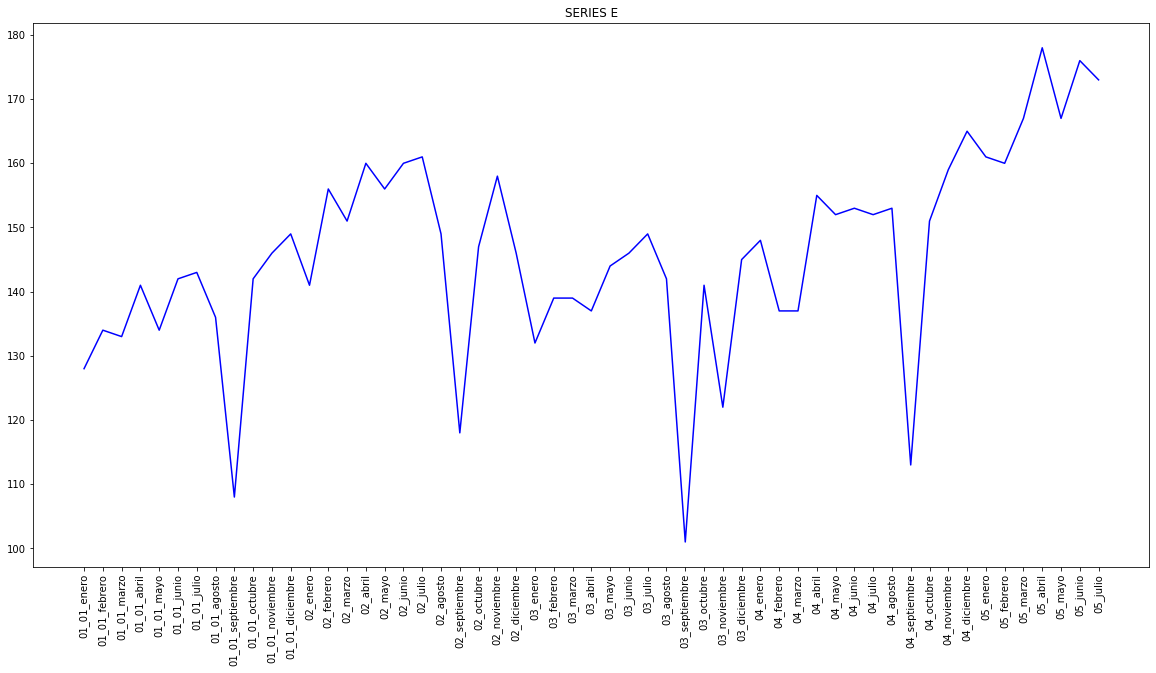

In [11]:
plt.figure(figsize=(20,10))
plt.plot(meses_E[0:len(Y_E)-6],Y_E[0:len(Y_E)-6],c='b')
plt.title('SERIES E')
plt.xticks(rotation=90)
plt.show()

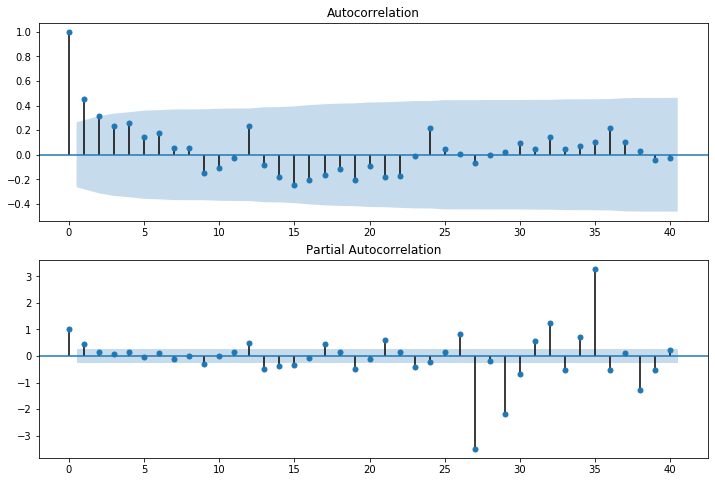

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y_E[0:len(Y_E)-6], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y_E[0:len(Y_E)-6], lags=40, ax=ax2)


In [32]:
arma_E_mod11 = sm.tsa.ARMA(Y_E[0:len(Y_E)-6], (1,1)).fit(disp=False)
print(arma_E_mod11.params)

[147.19057053   0.88234711  -0.54557842]


In [34]:
sm.stats.durbin_watson(arma_E_mod11.resid)

1.9039440214880416

In [31]:
arma_E_mod20 = sm.tsa.ARMA(Y_E[0:len(Y_E)-6], (2,0)).fit(disp=False)
print(arma_E_mod20.params)

[146.39759266   0.40999402   0.17543042]


In [30]:
arma_E_mod30 = sm.tsa.ARMA(Y_E[0:len(Y_E)-6], (3,0)).fit(disp=False)
print(arma_E_mod30.params)


[1.46535603e+02 3.95455189e-01 1.44975954e-01 9.30722035e-02]


### Series F. General Index of Industrial Production (Monthly). [Makridakis904]

In [12]:
Y_F=[96,97,99,100,102,106,102,80,104,104,107,102,100,107,110,111,114,113,109,91,116,118,123,121,119,125,131,132,135,138,132,106,134,132,136,132,133,140,142,146,148,149,147,115,150,152,158,154,155,159,160,163,167,160,162,126,160,161,167,167,164,165,173,179,181,182,175,131,183,181,184,179,181,179,187,185,183,177,176,130,176,175,181,176,175,182,182,185,191,191,188,139,189,190,199,193,195,200,205,208,216,216,210,169,217,213,220,217]
meses_F=meses
count=2
for i in range(0,len(Y_F)):
    if i>11:
        meses_F.append('0'+str(count)+'_'+meses_F[i%12])
        if i%12==11:
            count+=1
for i in range(0,12):
    meses_F[i]='01_'+meses_F[i]

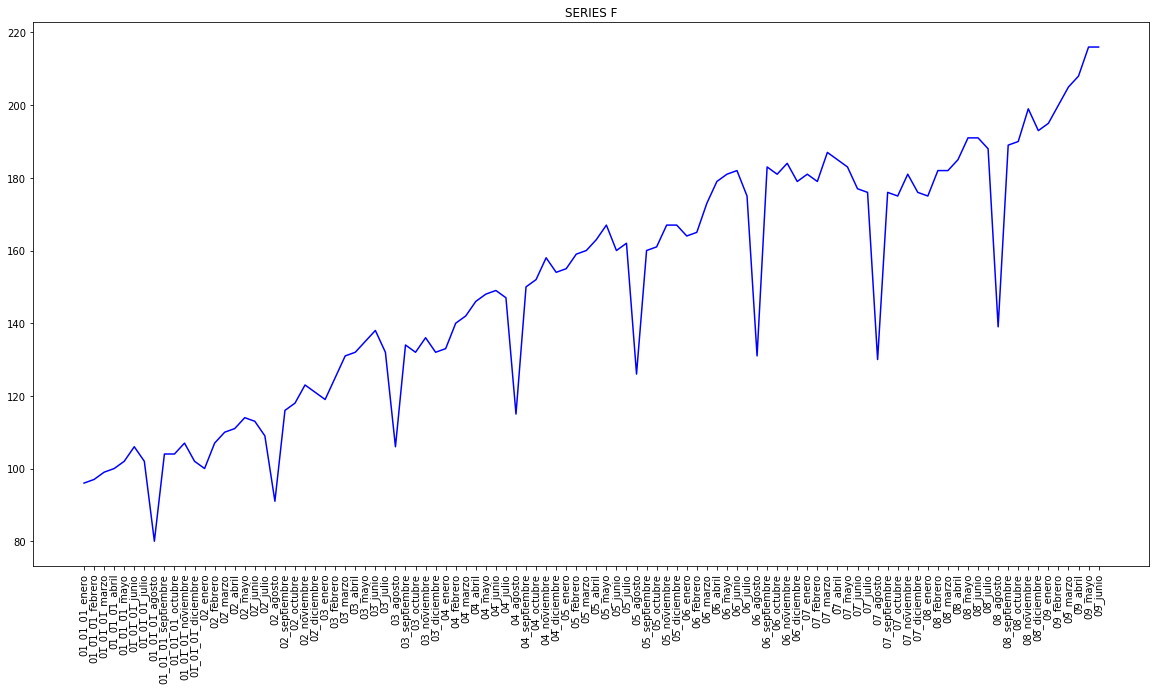

In [13]:
plt.figure(figsize=(20,10))
plt.plot(meses_F[0:len(Y_F)-6],Y_F[0:len(Y_F)-6],c='b')
plt.title('SERIES F')
plt.xticks(rotation=90)
plt.show()

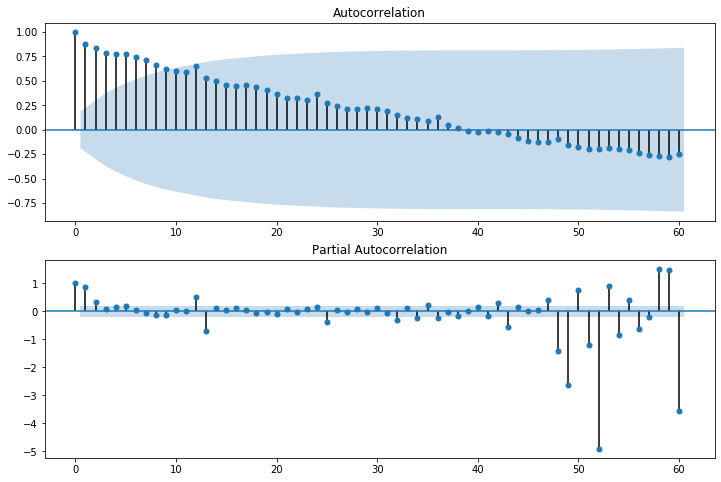

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y_F, lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y_F, lags=60, ax=ax2)
